<a href="https://colab.research.google.com/github/shreyajadhav03527/House-price-dataset/blob/main/House_price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset (2).csv


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('House Price Prediction Dataset.csv')

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.shape

(2000, 10)

In [ ]:
df.columns

Index(['id', 'area', 'bedrooms', 'bathrooms', 'floors', 'yearbuilt',
       'location', 'condition', 'garage', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2000 non-null   int64 
 1   area       2000 non-null   int64 
 2   bedrooms   2000 non-null   int64 
 3   bathrooms  2000 non-null   int64 
 4   floors     2000 non-null   int64 
 5   yearbuilt  2000 non-null   int64 
 6   location   2000 non-null   object
 7   condition  2000 non-null   object
 8   garage     2000 non-null   object
 9   price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
df.size

20000

In [ ]:
df.describe()

,id,area,bedrooms,bathrooms,floors,yearbuilt,price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
df.isnull().sum()

,0
id,0
area,0
bedrooms,0
bathrooms,0
floors,0
yearbuilt,0
location,0
condition,0
garage,0
price,0


In [ ]:
df.mean(numeric_only=True)

,0
id,1000.5000
area,2786.2095
bedrooms,3.0035
bathrooms,2.5525
floors,1.9935
yearbuilt,1961.4460
price,537676.8550


In [ ]:
df.count()

,0
id,2000
area,2000
bedrooms,2000
bathrooms,2000
floors,2000
yearbuilt,2000
location,2000
condition,2000
garage,2000
price,2000


In [ ]:
df.dtypes

,0
id,int64
area,int64
bedrooms,int64
bathrooms,int64
floors,int64
yearbuilt,int64
location,object
condition,object
garage,object
price,int64


In [ ]:
df.head()

,id,area,bedrooms,bathrooms,floors,yearbuilt,location,condition,garage,price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df['condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [ ]:
df['location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [ ]:
# removing the unwanted column
df=df.drop(columns=['id'])

In [ ]:
# feature and target separation
x=df.drop(columns=['price'])
y=df['price']


# x conatins all input features
# y contains target variable or what we want to predict

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42
                                               )


In [ ]:
x_train.shape

(1600, 8)

In [ ]:
x_test.shape

(400, 8)

In [ ]:
x_train.dtypes

,0
area,int64
bedrooms,int64
bathrooms,int64
floors,int64
yearbuilt,int64
location,object
condition,object
garage,object


In [ ]:
# linear model and reguralization are sensitive to features
# scalar so before regression we encode categorical features
# and scale numerical features

In [ ]:
categorical_cols=['location','condition','garage']
numerical_cols=x_train.drop(columns=categorical_cols).columns

In [ ]:
categorical_cols,numerical_cols

(['location', 'condition', 'garage'],
 Index(['area', 'bedrooms', 'bathrooms', 'floors', 'yearbuilt'], dtype='object'))

In [ ]:
# we will use oneHotEncoder cuz regression needs numbers
# it increases features=set up regularization need

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# ColumnTransformer is to apply different preprocessing to different columns
# numerical columns need scaling and categorical columns need encoding,
# so we should not treat all columns equally

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first'),categorical_cols)
])

# transformer=[]
# this is list of rules
# each rules follows this feature_format(name,transform,column)

In [ ]:
x_train_processed=preprocessor.fit_transform(x_train)
x_test_processed=preprocessor.transform(x_test)

In [ ]:
featured = preprocessor.get_feature_names_out()
featured

array(['num__area', 'num__bedrooms', 'num__bathrooms', 'num__floors',
       'num__yearbuilt', 'cat__location_Rural', 'cat__location_Suburban',
       'cat__location_Urban', 'cat__condition_Fair',
       'cat__condition_Good', 'cat__condition_Poor', 'cat__garage_Yes'],
      dtype=object)

In [ ]:
x_train_processed.shape

(1600, 12)

In [ ]:
x_test_processed.shape

(400, 12)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_processed,y_train)

LinearRegression()

In [ ]:
y_train_pred=lr.predict(x_train_processed)
y_test_pred=lr.predict(x_test_processed)


# predicting on both so
# train prediction-check how well model learned
# test prediction-check how well model generalizes
# we predict on training data to see learning ,in test to see the real world performance
#y_train_pred,y_test_pred

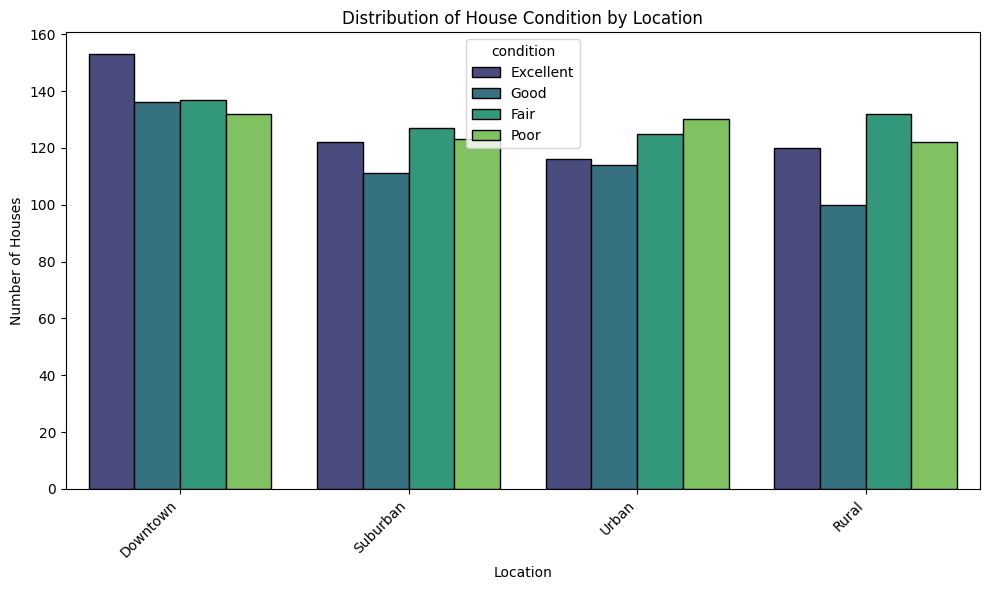

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='location', hue='condition', palette='viridis',edgecolor='black')
plt.title('Distribution of House Condition by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

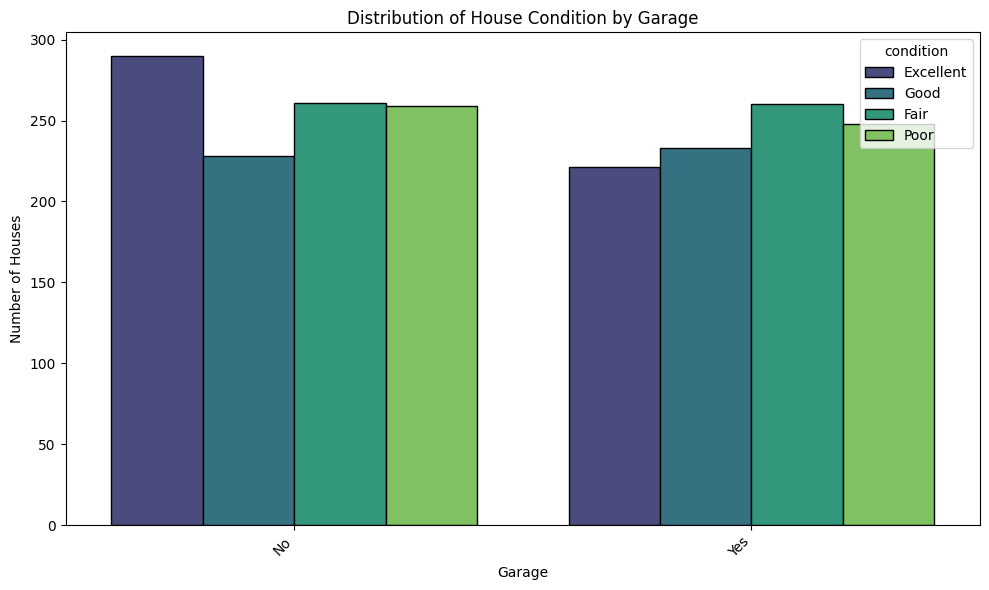

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='garage', hue='condition', palette='viridis',edgecolor='black')
plt.title('Distribution of House Condition by Garage')
plt.xlabel('Garage')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1924223860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='price', data=df, palette='viridis')


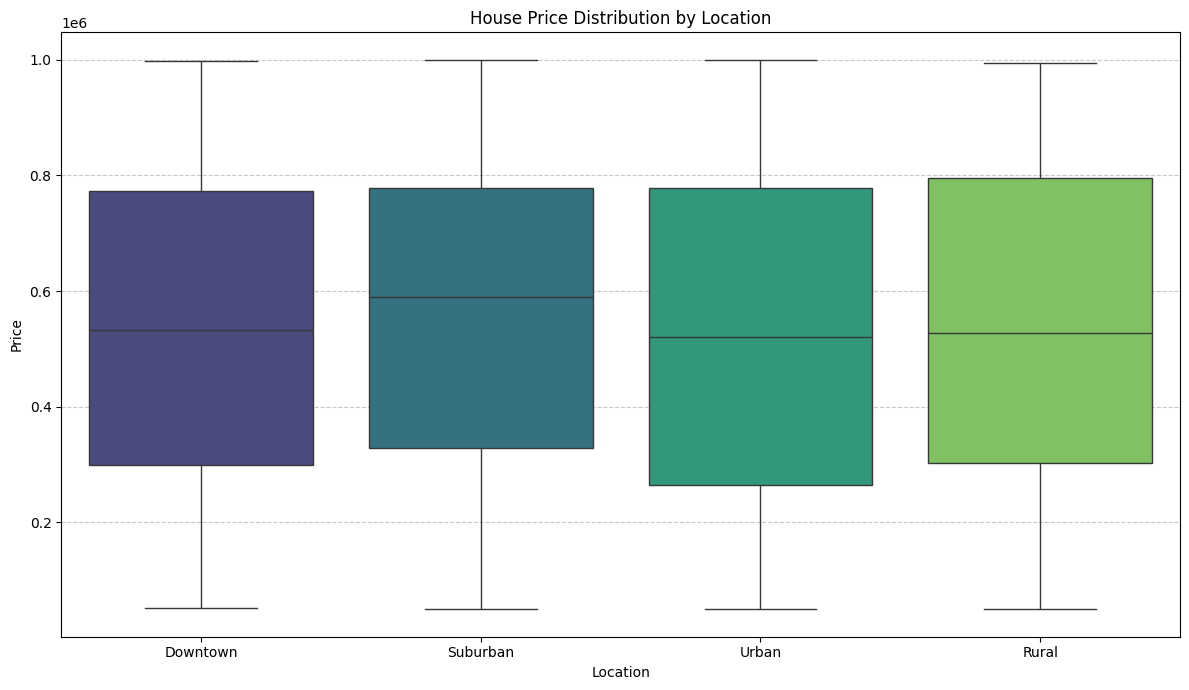

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='location', y='price', data=df, palette='viridis')
plt.title('House Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

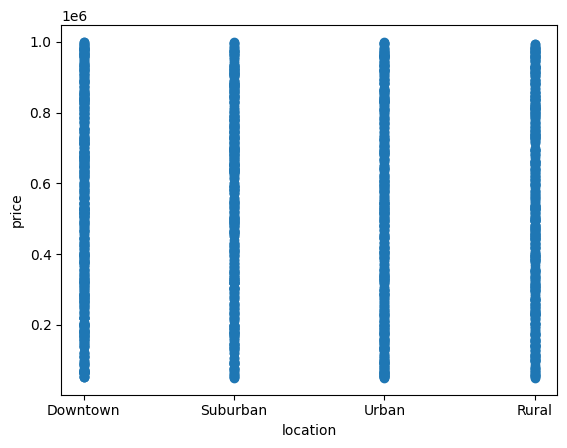

In [ ]:
plt.figure()
plt.scatter(df['location'],df['price'])
plt.xlabel('location')
plt.ylabel('price')
plt.show()

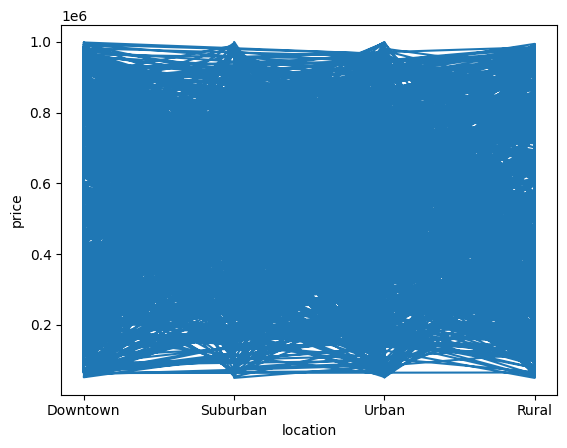

In [ ]:


plt.figure()
plt.plot(df['location'],df['price'])
plt.xlabel('location')
plt.ylabel('price')
plt.show()

In [ ]:
# error and residual interpretation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
# the reason for using mae, mse, rmse,r2 is that we never judge a model by
# accurancy in LinearRegreaaion here we used error based metrics

mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_test_pred)

print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)


# mae- tells the avg absolute difference between pridicted and actual house prices
# we use this is because its easy to understand ,same unit as price, less sensitive to outlier
#  (an outlier is a value that lies for away from the majority of values in the same col)

# mse- its squres the error ,so large mistake are penalized more it highlights big prediction error,used by many algorithms

# rmse- it brings the error back to the original price unite , making it easier to conect or interpret, penalizes large error ,same unit
# comparing target_outdated

# r2- r2 tells us how much of the variation in house prices is expalined by the model

MAE: 243241.97758826384
MSE: 78321466146.0328
RMSE: 279859.72583784326
R2: -0.006717808430749761


In [ ]:
# r2
# 0.0-model explains nothing
# 1.0-model explains perfect
# 0.80-model explains 80% of the variation
# r2<0 -worse than avg prediction



In [ ]:
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)
print('Train R2:',train_r2)
print('Test R2:',test_r2)


# eventhough our error values look reasonable ,the r2 score is nagative ,which tells us
# the model is not learnig meaningful pattterns from the data
# this indicates underfitting and we need regularization or a better model


Train R2: 0.009856184863687889
Test R2: -0.006717808430749761


In [ ]:
# regularization(ridge and lasso)

# ridge regression

from sklearn.linear_model import Ridge
ridge=Ridge(alpha = 1.0)
ridge.fit(x_train_processed,y_train)

y_train_pred_ridge=ridge.predict(x_train_processed)
y_test_pred_ridge=ridge.predict(x_test_processed)

# ridge deduces the impact of less important features removing them


In [ ]:
from sklearn.metrics import r2_score

ridge_train_r2=r2_score(y_train,y_train_pred_ridge)
ridge_test_r2=r2_score(y_test,y_test_pred_ridge)

ridge_train_r2,ridge_test_r2

(0.009856156591055543, -0.006715935063532852)

In [ ]:
# lasso regression
# ridge reduces the impact of useless features while lasoo can completely
# eliminate useless features

from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1.0,max_iter=10000)
lasso.fit(x_train_processed,y_train)

y_train_pred_lasso=lasso.predict(x_train_processed)
y_test_pred_lasso=lasso.predict(x_test_processed)

# ridge - shrink coefficient
# lasso-shrinks and can remove coefficient sometimes make them zero too

In [ ]:
lasso_train_r2=r2_score(y_train,y_train_pred_lasso)
lasso_test_r2=r2_score(y_test,y_test_pred_lasso)

lasso_train_r2,lasso_test_r2

(0.009856184363990605, -0.006715988317251176)

In [ ]:
# underfitting ,properfitting ,overfitting

# underfitting-linear regression-train score-low,test score-low
# properfitting-ridge regression-train score-good,test score-good
# overfitting-lasso regression-train score-veryhigh,test score-low

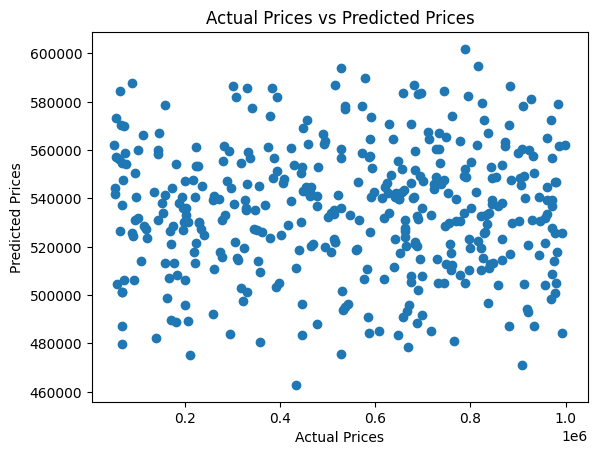

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()